### PREDICTION PLAYGROUND [KSSL]
___

In [207]:
from spectrai.datasets.kssl import (get_tax_orders_lookup_tbl, load_analytes, get_analytes_like, load_data)
from spectrai.vis.spectra import (plot_spectra)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from tqdm import tqdm

from scipy.signal import savgol_filter

from kymatio.numpy import Scattering1D

%load_ext autoreload
%autoreload 2
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [359]:
# To predict
#  Calcium carbonate, Clay content, pH, Organic matter,Ammonium NH4 

# Depth layers
# < 10 cm = organic (surface)
# 10 - 30 cm
# > 30cm

In [201]:
# 2. Identify the analyte of interest
get_analytes_like('otassi')

analyte_id                                       analyte_name  \
63           78                Potassium, Neutral Salt Extractable   
69           84                      Potassium, NH4OAc Extractable   
229         218                    Potassium Feldspar, petro_count   
350         675                           Potassium, Major Element   
428         379                      Potassium, Saturation Extract   
454         406                                   Potassium, Total   
509         464                          Potassium Feldspar, x-ray   
527         725  Potassium, NH4OAc Extractable, 2M KCl displace...   
606        1065            Potassium, Element Mehlich3 Extractable   
638        1167                       Potassium, Water Extractable   
655        1184                                   Potassium, Water   
677        1206                           Potassium, Water Element   
818        1347                       Potassium Feldspar, x-ray pm   
912        1449              Potassium, X-Ray Flourescence Element   

         analyte_abbrev  uom_abbrev  
63       k_neutral_salt  cmol(+)/kg  
69                k_nh4  cmol(+)/kg  
229  min_FK_petro_count       count  
350             k_mjelm       mg/kg  
428              k_satx   mmol(+)/L  
454               k_tot        % wt  
509        min_FK_x-ray   peak_size  
527              k_nh4d  cmol(+)/kg  
606           k_el_meh3       mg/kg  
638              k_watx       µg/kg  
655               k_wat        µg/L  
677             k_wtelm        mg/L  
818     min_FK_x-ray_pm   peak_size  
912              k_pxrf         ppm

In [226]:
# 3. Load spectra + target variable
X, X_names, y, y_names, instances_id = load_data([725])

print('X shape: ', X.shape)
print('Wavenumbers: ', X_names)
print('Target variable: ', y_names)

X shape:  (50714, 1764)
Wavenumbers:  [3999 3997 3995 ...  603  601  599]
Target variable:  ['lay_depth_to_top' 'order_id' 'calc_value']


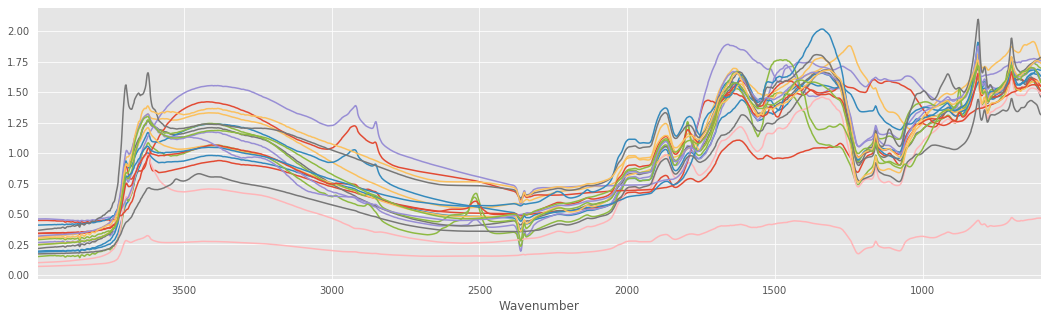

In [205]:
plot_spectra(X, X_names)

In [204]:
# Filter by taxonomic order, layer depth
get_tax_orders_lookup_tbl()

{'alfisols': 0,
 'mollisols': 1,
 'inceptisols': 2,
 'entisols': 3,
 'spodosols': 4,
 nan: 5,
 'ultisols': 6,
 'andisols': 7,
 'histosols': 8,
 'oxisols': 9,
 'vertisols': 10,
 'aridisols': 11,
 'gelisols': 12}

In [69]:
y_names

array(['lay_depth_to_top', 'order_id', 'calc_value'], dtype=object)

In [68]:
get_tax_orders_lookup_tbl()

{'alfisols': 0,
 'mollisols': 1,
 'inceptisols': 2,
 'entisols': 3,
 'spodosols': 4,
 nan: 5,
 'ultisols': 6,
 'andisols': 7,
 'histosols': 8,
 'oxisols': 9,
 'vertisols': 10,
 'aridisols': 11,
 'gelisols': 12}

(array([2.000e+00, 2.000e+00, 2.500e+01, 1.242e+03, 1.270e+02, 1.753e+03,
        3.405e+03, 4.254e+03, 6.093e+03, 7.452e+03, 8.139e+03, 6.571e+03,
        4.183e+03, 2.790e+03, 1.511e+03, 6.800e+02, 3.080e+02, 6.300e+01,
        2.600e+01, 1.000e+01]),
 array([-5.39036687, -4.94704725, -4.50372762, -4.060408  , -3.61708838,
        -3.17376876, -2.73044914, -2.28712952, -1.84380989, -1.40049027,
        -0.95717065, -0.51385103, -0.07053141,  0.37278821,  0.81610784,
         1.25942746,  1.70274708,  2.1460667 ,  2.58938632,  3.03270594,
         3.47602557]),
 <a list of 20 Patch objects>)

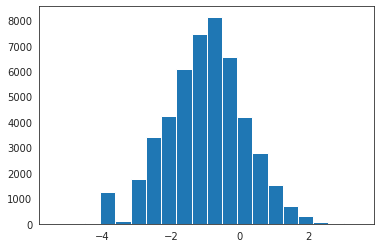

In [66]:
plt.hist(np.log(y[y[:,-1] > 0,-1]), bins=20)

In [255]:
y_names

array(['lay_depth_to_top', 'order_id', 'calc_value'], dtype=object)

In [226]:
get_tax_orders_lookup_tbl()

{'alfisols': 0,
 'mollisols': 1,
 'inceptisols': 2,
 'entisols': 3,
 'spodosols': 4,
 nan: 5,
 'ultisols': 6,
 'andisols': 7,
 'histosols': 8,
 'oxisols': 9,
 'vertisols': 10,
 'aridisols': 11,
 'gelisols': 12}

In [231]:
idx_alfi = (y[:, 1] == 0)

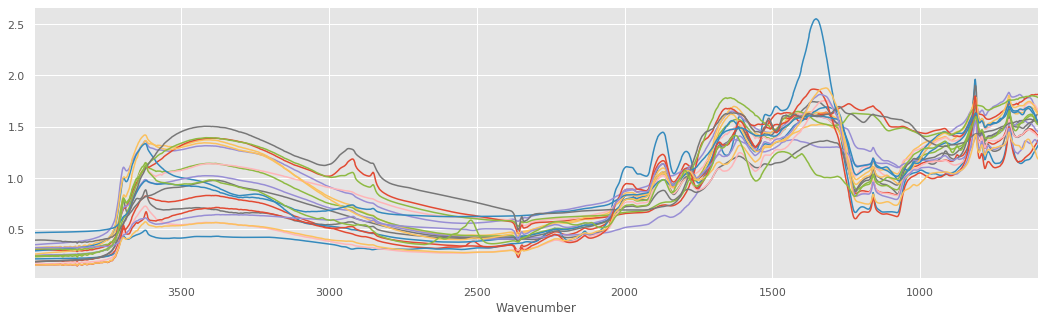

In [77]:
plot_spectra(X, X_names)

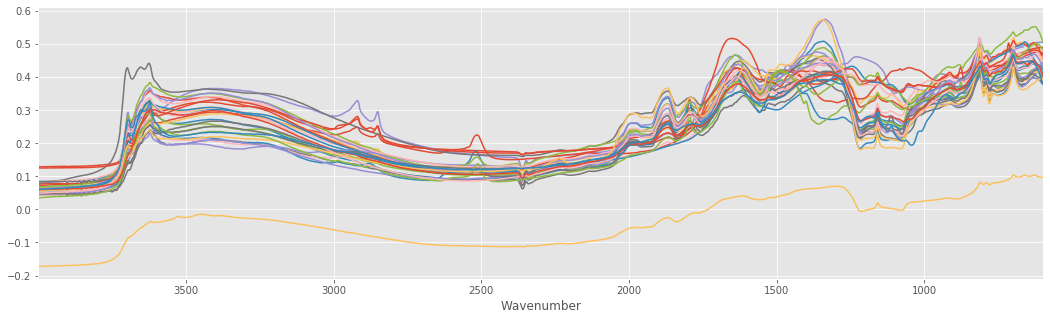

In [83]:
plot_spectra(X, X_names, sample=30)

In [78]:
X /= np.abs(X).max()

In [ ]:
x /= np.abs(x).max()

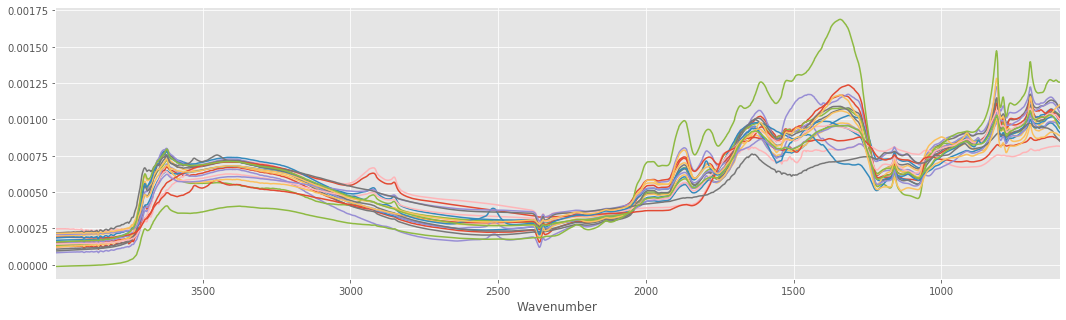

In [89]:
plot_spectra(normalize(X, norm='l1', axis=1, copy=True, return_norm=False), X_names)

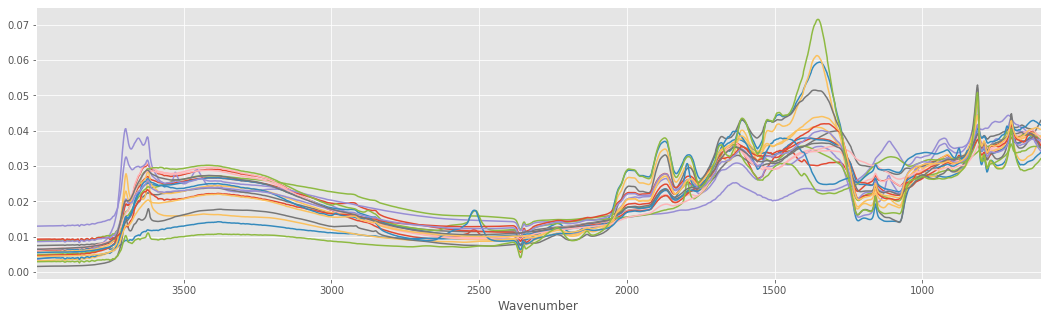

In [88]:
plot_spectra(normalize(X, norm='l2', axis=1, copy=True, return_norm=False), X_names)

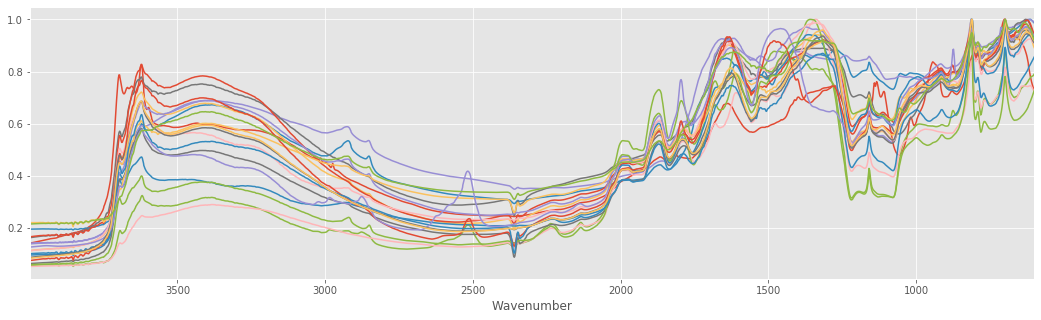

In [90]:
plot_spectra(normalize(X, norm='max', axis=1, copy=True, return_norm=False), X_names)

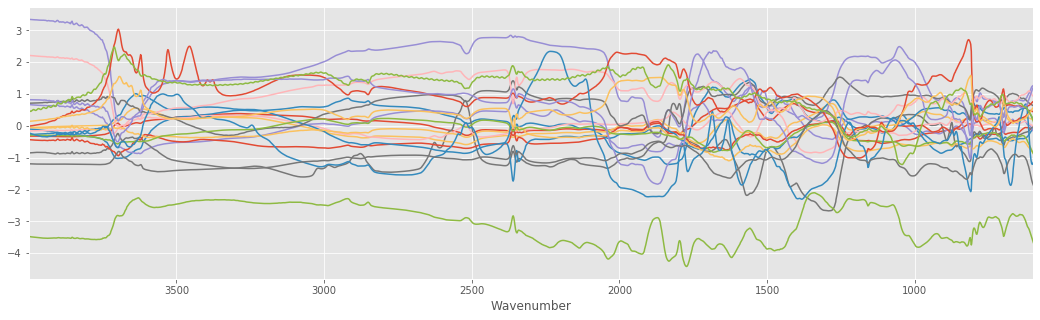

In [94]:
scaler = StandardScaler()
scaler.fit(X)
plot_spectra(scaler.transform(X), X_names)

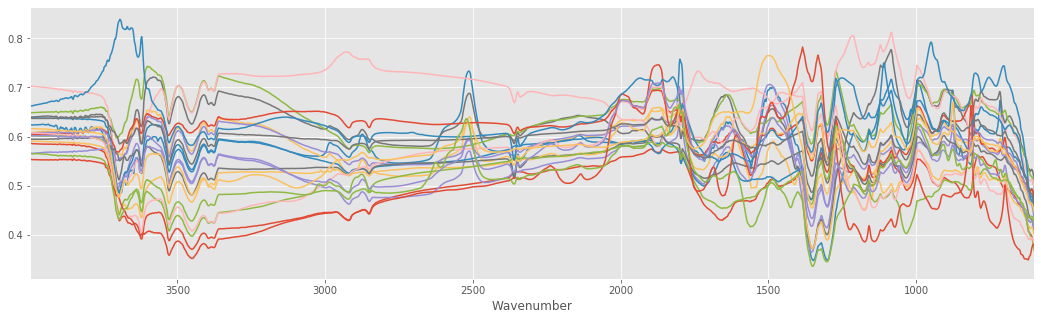

In [96]:
scaler = MinMaxScaler()
scaler.fit(X)
plot_spectra(scaler.transform(X), X_names)

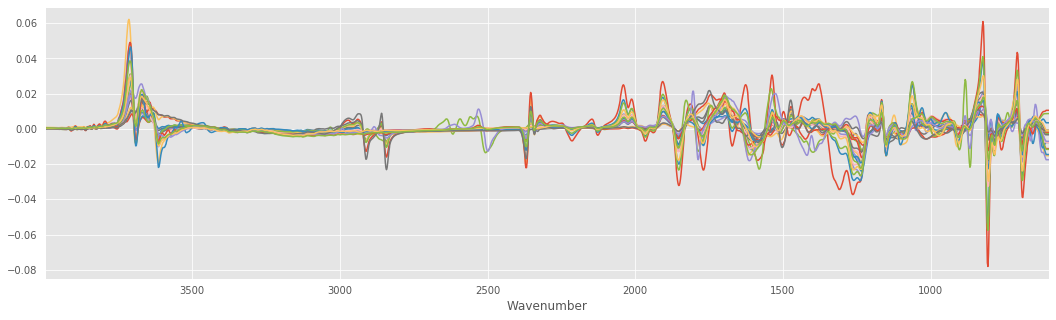

In [206]:
plot_spectra(savgol_filter(X, 11, polyorder = 1, deriv=1), X_names, figsize=(18,5))

In [100]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

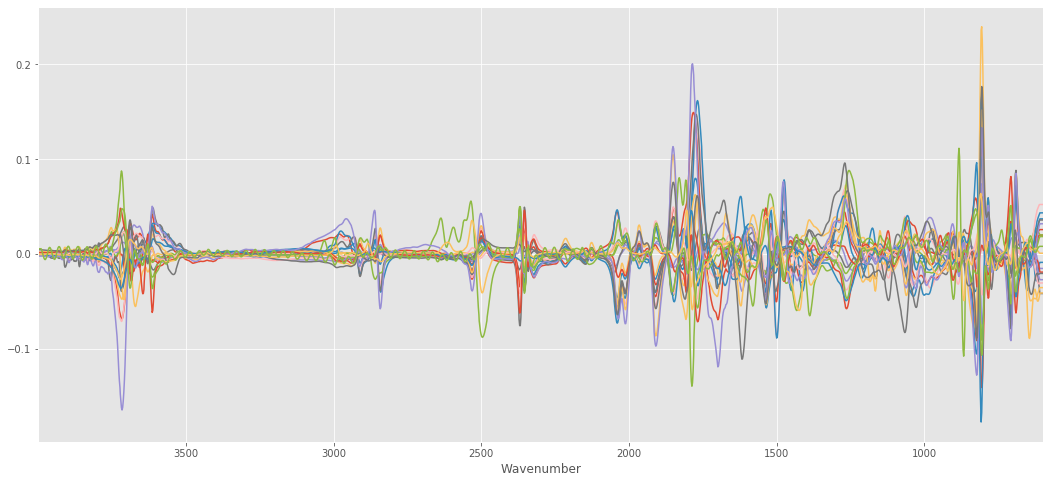

In [101]:
plot_spectra(savgol_filter(scaler.transform(X), 11, polyorder = 1, deriv=1), X_names, figsize=(18,8))

### Assessing PCA

In [13]:
def compute_pca(X, n_components=5):
    transformer = PCA(n_components=n_components)
    return transformer.fit_transform(X)

def compute_k_pca(X, components=7, kernel='linear'):
    transformer = KernelPCA(n_components=7, kernel=kernel)
    return transformer.fit_transform(X)

def plot_pca(X, y, components=[0, 1], sample=1000):
    idx = np.random.randint(X.shape[0], size=sample)
    fig = plt.figure(figsize=(10,10))
    with plt.style.context(('ggplot')):
        plt.scatter(X[idx, components[0]], X[idx, components[1]], c=y[idx], cmap=ListedColormap(['firebrick', 'steelblue']), marker='.', alpha=0.8)

* **On SNV data**

In [248]:
X_p_snv = compute_pca(StandardScaler().fit_transform(X))

In [19]:
def plot_correlogram(X, y, q=2, y_label='analyte', title='', sample=1000, alpha=0.6):
    idx = np.random.randint(X.shape[0], size=sample)
    X = X[idx, :]
    y = y[idx]
    col_names = ['PC' + str(i+1) for i in range(X.shape[1])] + [y_label]
    df = pd.DataFrame(np.c_[X, y], columns=col_names)
    df[y_label] = pd.qcut(df[y_label], q)
    sns.set_style("white")
    g = sns.pairplot(df, hue=y_label, vars=col_names[:-1],
                     corner=True, palette=sns.color_palette("Set1"),
                     plot_kws=dict(s=20, edgecolor='none', alpha=alpha),
                     diag_kws=dict(shade=False))
    g._legend.set_title(y_label + ' concentration values')
    g.fig.suptitle(title, fontsize=16)

Accuracy of Logistic regression classifier:  0.7110659778364948
Accuracy of k-Nearest Neighbours classifier:  0.8527231139330362


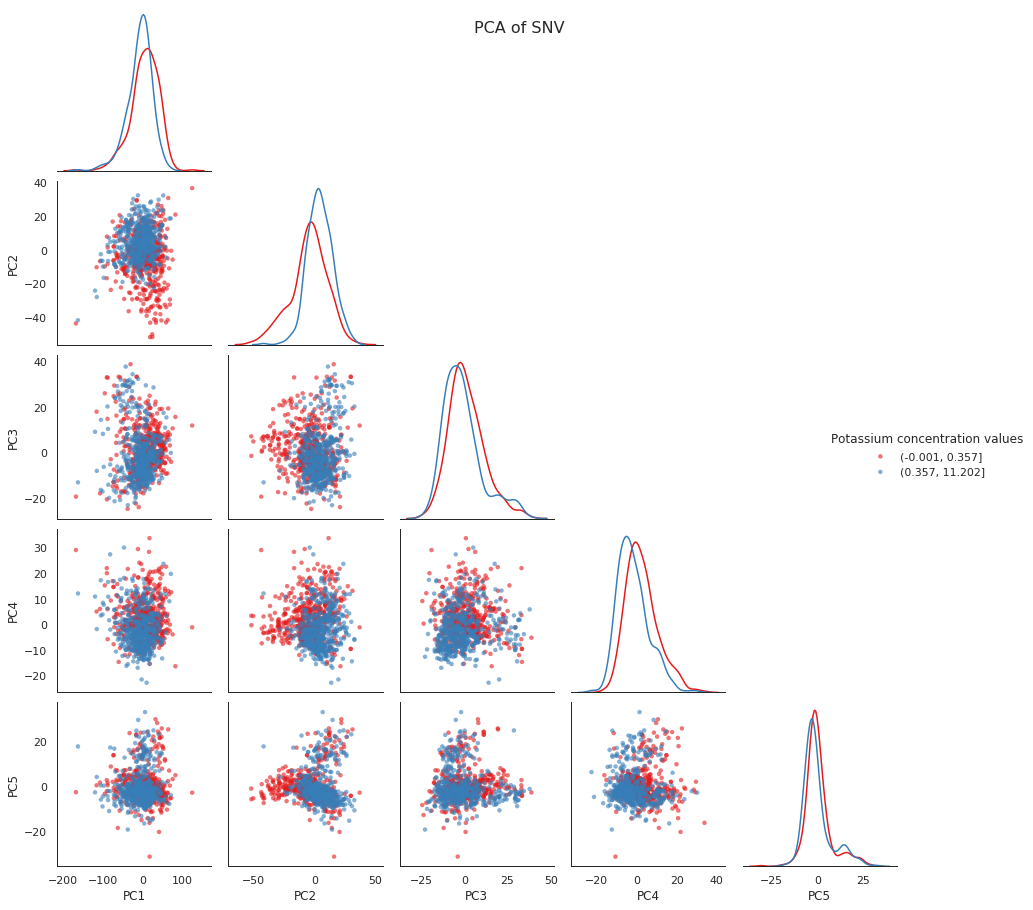

In [250]:
plot_correlogram(X_p_snv, y[:, -1], q=2, sample=1000, alpha=0.6, y_label='Potassium', title='PCA of SNV')

y_digitized = np.digitize(y[:,-1], [np.median(y[:,-1])])
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_p_snv, y_digitized)
print('Accuracy of Logistic regression classifier: ', clf.score(X_p_snv, y_digitized))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_p_snv, y_digitized)
print('Accuracy of k-Nearest Neighbours classifier: ', knn.score(X_p_snv, y_digitized))

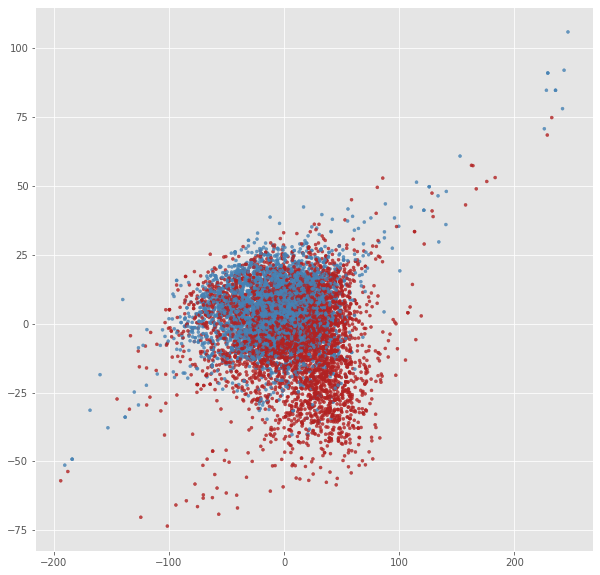

In [87]:
plot_pca(X_p_snv, np.digitize(y[:,-1],bins=[np.median(y[:,-1])]), components=[0,1], sample=10000)

In [ ]:
# What about on alfisols only?
X[idx_alfi, :]

In [242]:
X_p_snv = compute_pca(StandardScaler().fit_transform(X[idx_alfi, :]), n_components=10)

0.7515116052272284

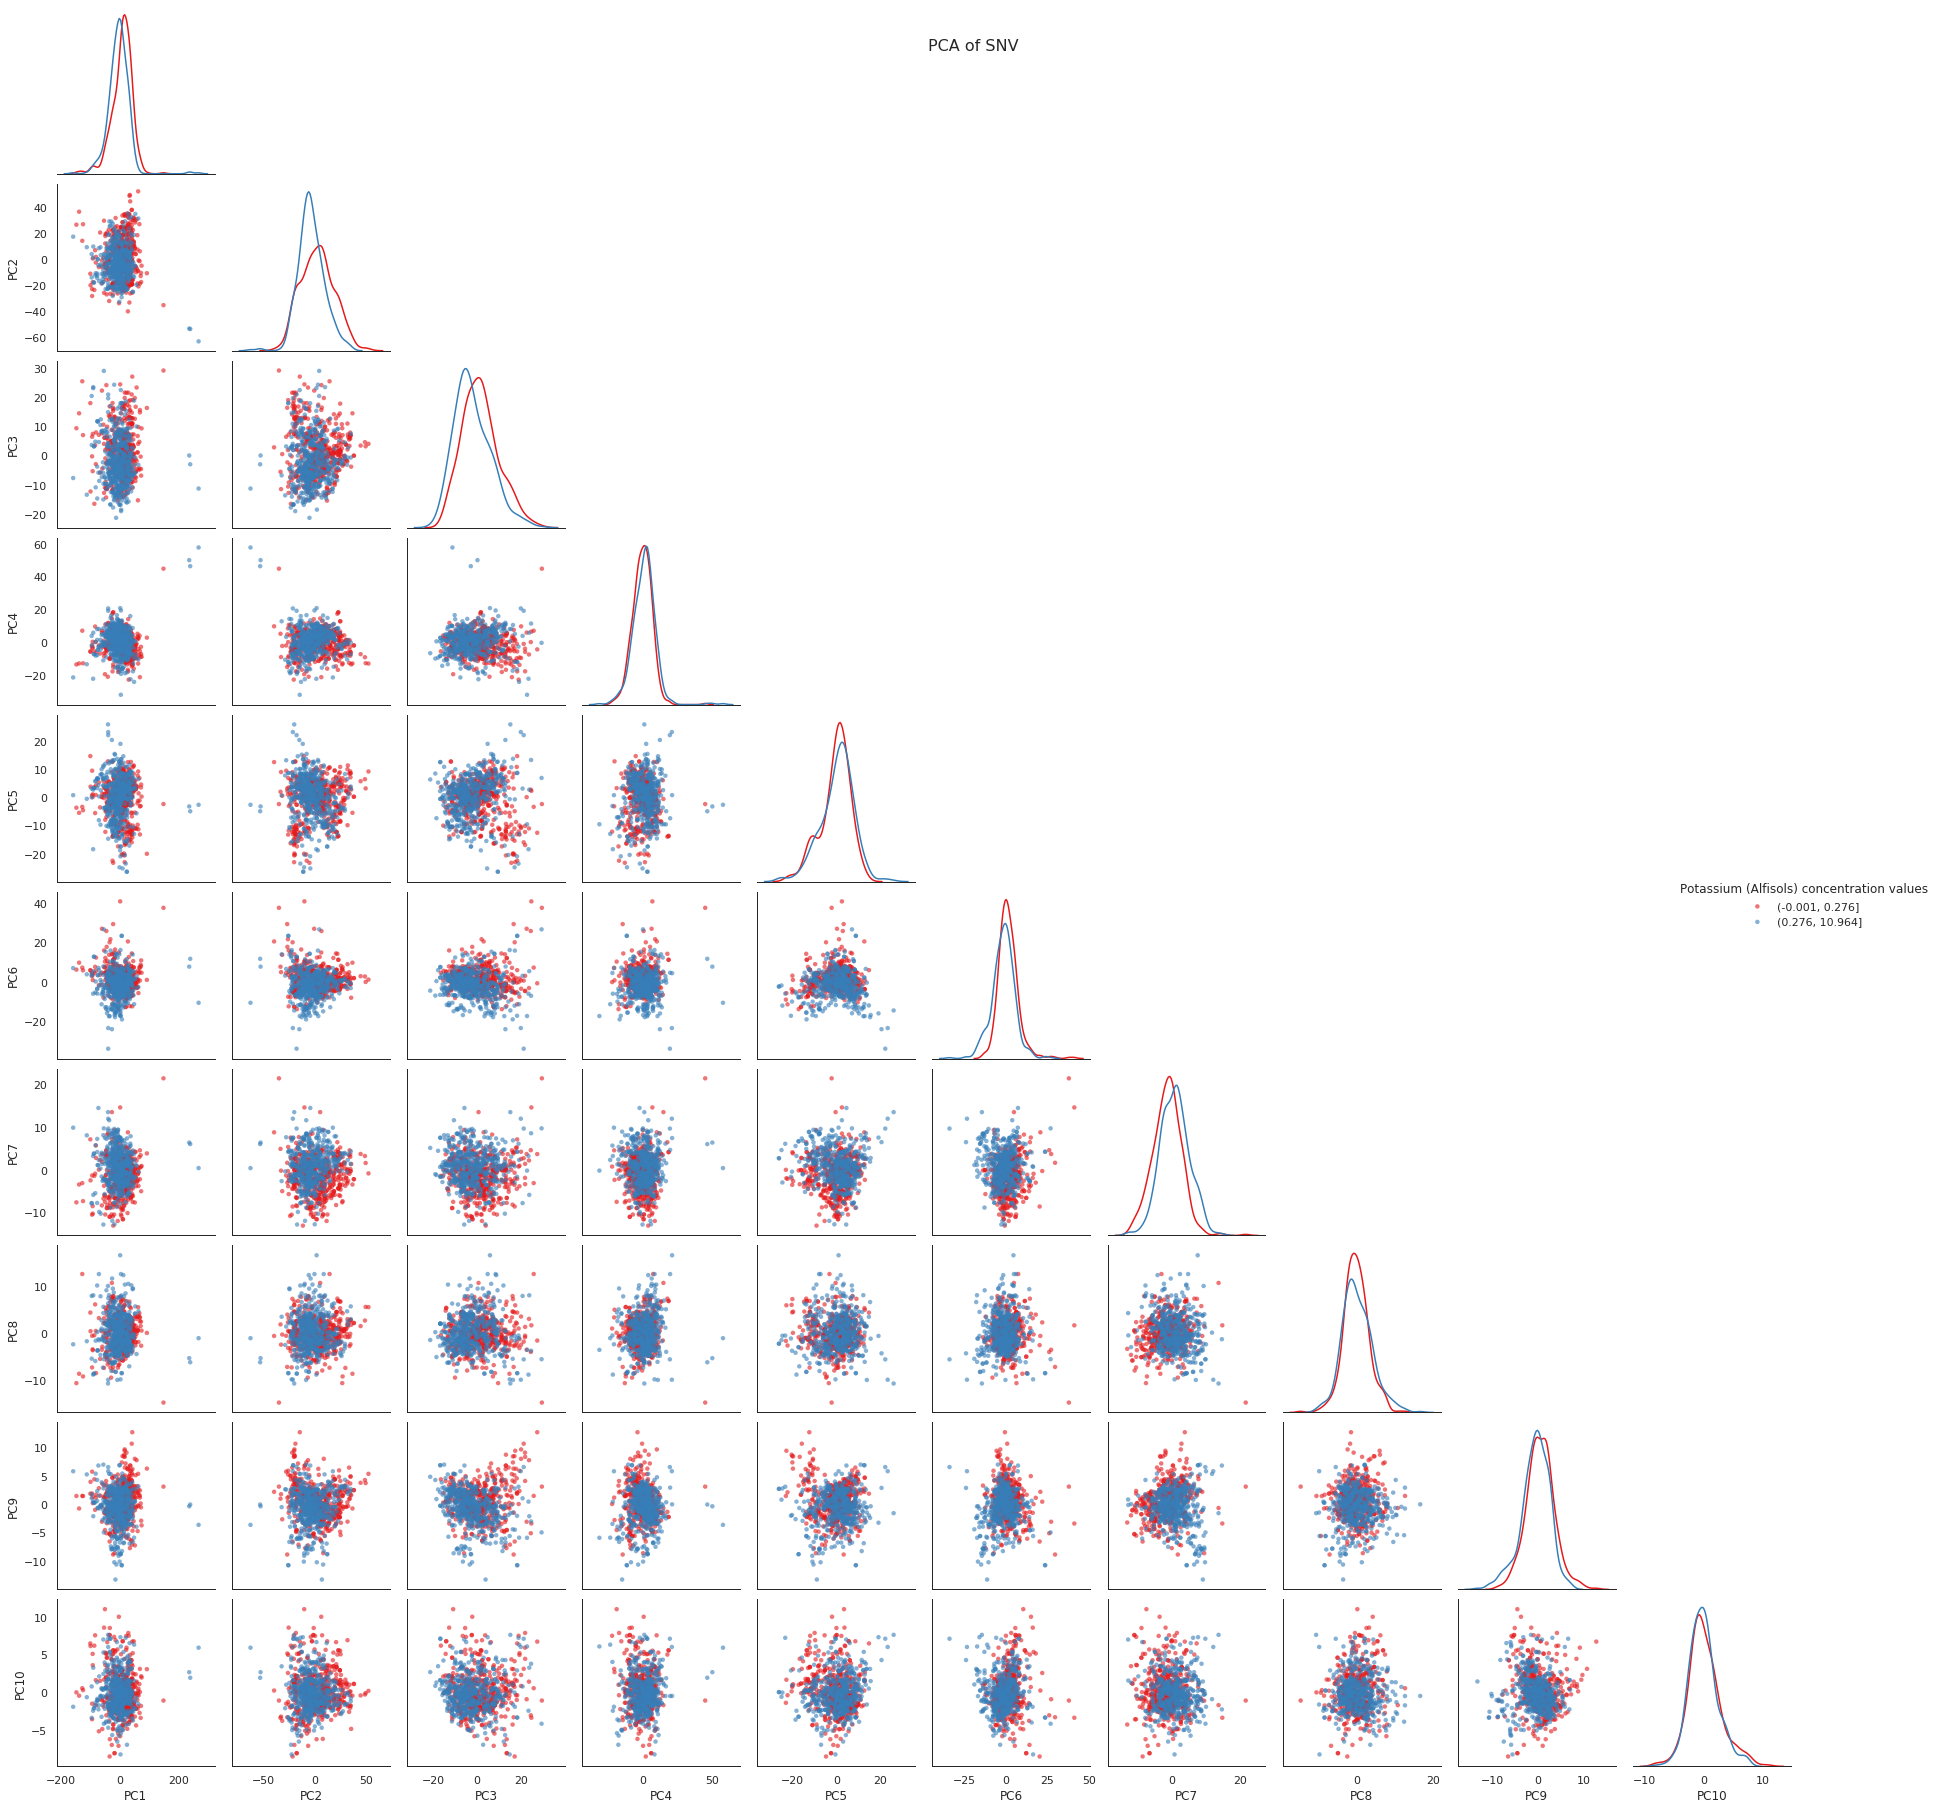

In [243]:
plot_correlogram(X_p_snv, y[idx_alfi, -1], q=2, sample=1000, alpha=0.6, y_label='Potassium (Alfisols)', title='PCA of SNV')

y_digitized = np.digitize(y[idx_alfi,-1], [np.median(y[idx_alfi,-1])])
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_p_snv, y_digitized)
clf.score(X_p_snv, y_digitized)

* **When 1-derivative taken**

In [253]:
X_p_1d = compute_pca(savgol_filter(X, 11, polyorder = 1, deriv=1), n_components=5)

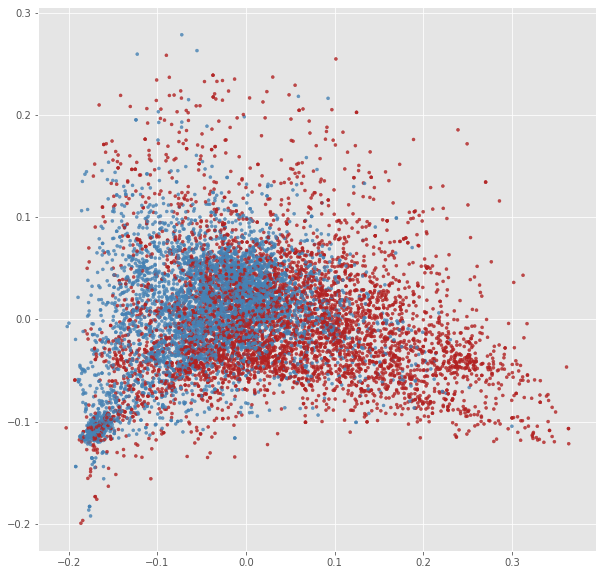

In [88]:
plot_pca(X_p_1d, np.digitize(y[:,-1],bins=[np.median(y[:,-1])]), components=[0,1], sample=10000)

Accuracy of Logistic regression classifier:  0.7299759435264424
Accuracy of k-Nearest Neighbours classifier:  0.8770753638048665


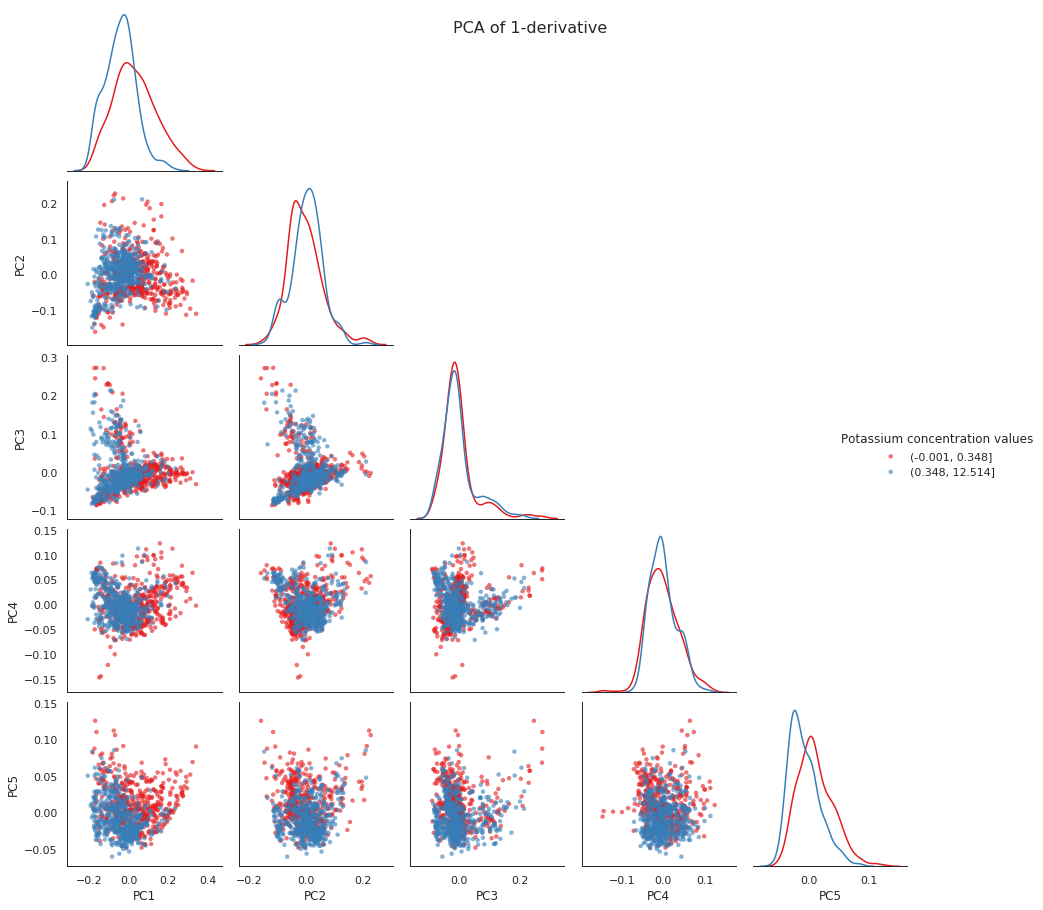

In [252]:
plot_correlogram(X_p_1d, y[:, -1], q=2, sample=1000, alpha=0.6, y_label='Potassium', title='PCA of 1-derivative')

y_digitized = np.digitize(y[:,-1], [np.median(y[:,-1])])
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_p_1d, y_digitized)
print('Accuracy of Logistic regression classifier: ', clf.score(X_p_1d, y_digitized))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_p_1d, y_digitized)
print('Accuracy of k-Nearest Neighbours classifier: ', knn.score(X_p_1d, y_digitized))

In [213]:
y_digitized = np.digitize(y[:,-1], [np.median(y[:,-1])])
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_p_1d, y_digitized)
clf.score(X_p_1d, y_digitized)

0.7299759435264424

In [179]:
analytes = load_analytes()
analytes.head()

analyte_id                             analyte_name analyte_abbrev  \
0           1  Aggregate Stability, 0.5-2mm Aggregates         aggstb   
1           2                  Liquid Limit, Atterberg          abgll   
2           3                 Plastic Limit, Atterberg          abgpl   
3           4     Bulk Density, <2mm Fraction, 1/3 Bar         db_13b   
4           5     Bulk Density, <2mm Fraction, Ovendry          db_od   

  uom_abbrev  
0       % wt  
1      % H2O  
2      % H2O  
3       g/cc  
4       g/cc

In [190]:
get_analytes_like('pH')

analyte_id                                       analyte_name  \
67           82                                CEC, NH4OAc, pH 7.0   
72           88             Acidity, BaCl2-TEA Extractable, pH 8.2   
122         795  Acidity, BaCl2-TEA Extractable, pH 8.2, centri...   
273         265                        pH, 1:1 Soil-KCl Suspension   
274         266                      pH, 1:50 Soil-NaFl Suspension   
275         267                            pH, Oxidized (sulfidic)   
276         268                      pH, 1:1 Soil-Water Suspension   
305         477                          pH, 0.01M CaCl2, Histosol   
309         481                      pH, 1:2 Soil-CaCl2 Suspension   
310         482                                pH, Saturated Paste   
525         723           CEC, NH4OAc, pH 7.0, 2M KCl displacement   
558         890                             pH, Oxidized (initial)   
627        1156                                  pH, Water Extract   
651        1180                                          pH, Water   
947        1492                               pH, Oxidized (field)   
948        1493                   pH, Oxidized (field temperature)   
949        1494                               pH, Oxidized (delta)   

    analyte_abbrev  uom_abbrev  
67         cec_nh4  cmol(+)/kg  
72        acid_tea  cmol(+)/kg  
122      acid_teac  cmol(+)/kg  
273         ph_kcl        (NA)  
274         ph_naf        (NA)  
275          ph_ox        (NA)  
276         ph_h2o        (NA)  
305        ph_hist        (NA)  
309       ph_cacl2        (NA)  
310          ph_sp        (NA)  
525       cecd_nh4  cmol(+)/kg  
558        ph_oxin        (NA)  
627        ph_watx        (NA)  
651         ph_wat        (NA)  
947       ph_oxfld        (NA)  
948    ph_oxfldtmp        (NA)  
949         ph_oxd        (NA)

In [214]:
X, X_names, y, y_names, instances_id = load_data(analytes=[622])

In [184]:
X.shape

(72576, 1764)

In [215]:
X_p_snv = compute_pca(StandardScaler().fit_transform(X))

0.8826333774250441

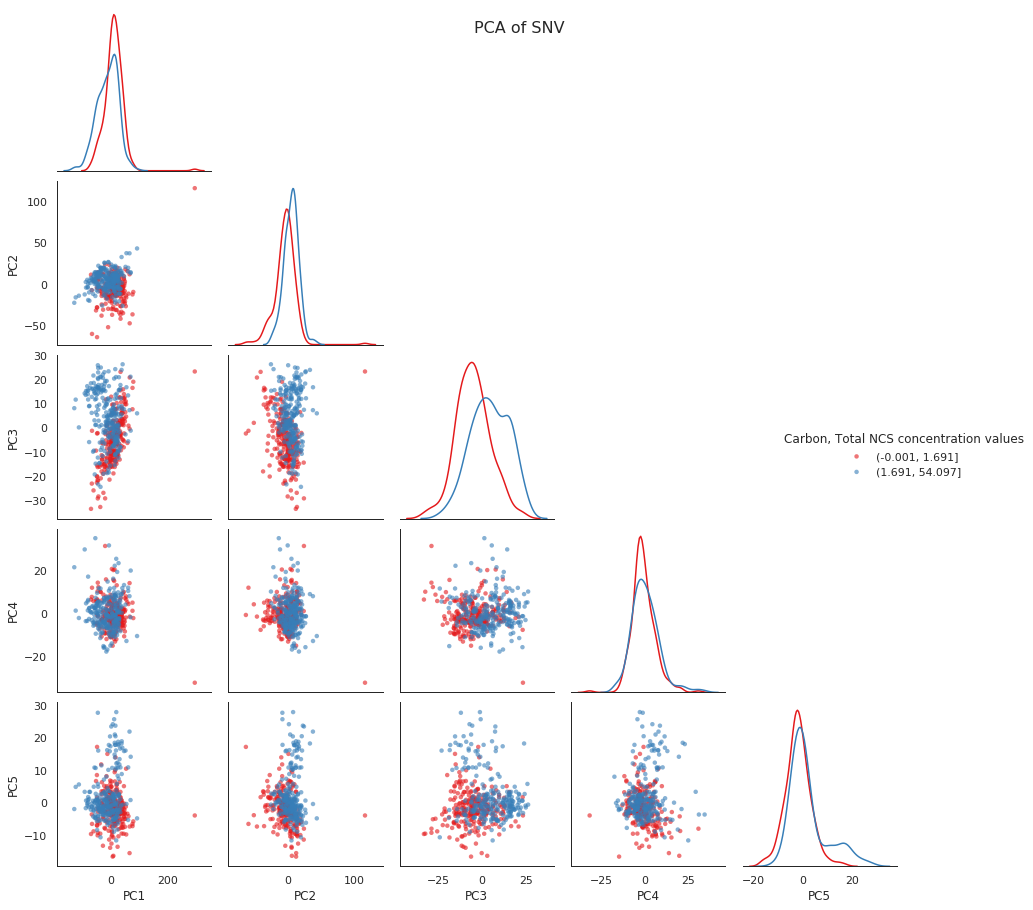

In [216]:
plot_correlogram(X_p_snv, y[:, -1], q=2, sample=500, alpha=0.6, y_label='Carbon, Total NCS', title='PCA of SNV')

y_digitized = np.digitize(y[:,-1], [np.median(y[:,-1])])
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_p_snv, y_digitized)
clf.score(X_p_snv, y_digitized)

In [222]:
X_p_1d = compute_pca(savgol_filter(X, 11, polyorder = 1, deriv=1), n_components=5)

0.8975143298059964

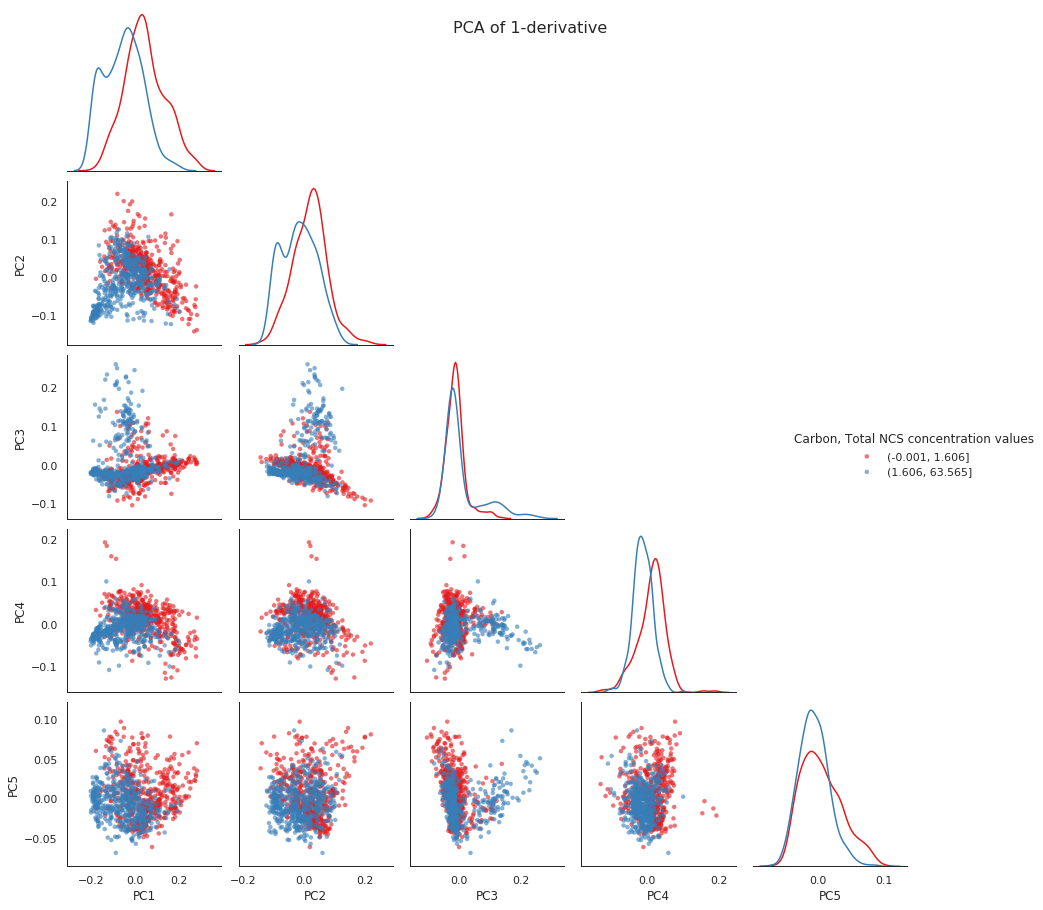

In [223]:
plot_correlogram(X_p_1d, y[:, -1], q=2, sample=1000, alpha=0.6, y_label='Carbon, Total NCS', title='PCA of 1-derivative')

y_digitized = np.digitize(y[:,-1], [np.median(y[:,-1])])
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_p_1d, y_digitized)
clf.score(X_p_1d, y_digitized)

### What about wavelet scattering projection 

In [4]:
def preprocess(x):
    x = x[:,:-1]
    x /= np.abs(x).max()
    return x

def flatten_coeffs(coeffs):
    shape_old = coeffs.shape
    batch_size = shape_old[0]
    return coeffs.reshape((batch_size, -1))

def unflatten_coeffs(coeffs, shape_old):
    return coeffs.reshape(shape_old)

def prune_coeffs(coeffs, ratio=0.95):
    mask = coeffs <= np.quantile(coeffs, ratio) 
    coeffs[mask] = 0
    return coeffs

def toScatter(X, J=4, Q=12, ratio=0.95, orders=[0,1,2]):
    x = preprocess(X)
    J = 4 # Default 4 - when J increases, it decreases time resolution and have more translation-invariant properties
    Q = 12 # Default 30
    T = x.shape[-1]
    scattering = Scattering1D(J, T, Q)
    Sx = scattering(x)
    
    meta = scattering.meta()
    order0 = meta['order'] == 0
    order1 = meta['order'] == 1
    order2 = meta['order'] == 2
    
    coeffs_flat = []
    
    for order in orders:
        if order == 0:
            coeffs_flat.append(flatten_coeffs(Sx[:,order0,:]))
        elif order == 1:
            coeffs_flat.append(prune_coeffs(flatten_coeffs(Sx[:,order1,:]), ratio=ratio))
        elif order == 2:
            coeffs_flat.append(prune_coeffs(flatten_coeffs(Sx[:,order2,:]), ratio=ratio))
            
    #coeffs_0_flat = flatten_coeffs(Sx[:,order0,:])
    #coeffs_1_flat = prune_coeffs(flatten_coeffs(Sx[:,order1,:]), ratio=ratio)
    #coeffs_2_flat = prune_coeffs(flatten_coeffs(Sx[:,order2,:]), ratio=ratio)
    #return np.c_[coeffs_0_flat, coeffs_1_flat, coeffs_2_flat]
    return np.concatenate(coeffs_flat, axis=1)

In [5]:
idx = np.random.randint(X.shape[0], size=1000)

In [24]:
J = 4 # Default 4 - when J increases, it decreases time resolution and have more translation-invariant properties
Q = 12 # Default 30

X_s = toScatter(preprocess(X[idx, :]), J=3, Q=12, ratio=0.9, orders=[1,2])

In [25]:
X_scatter_pca = compute_pca(X_s, n_components=5)

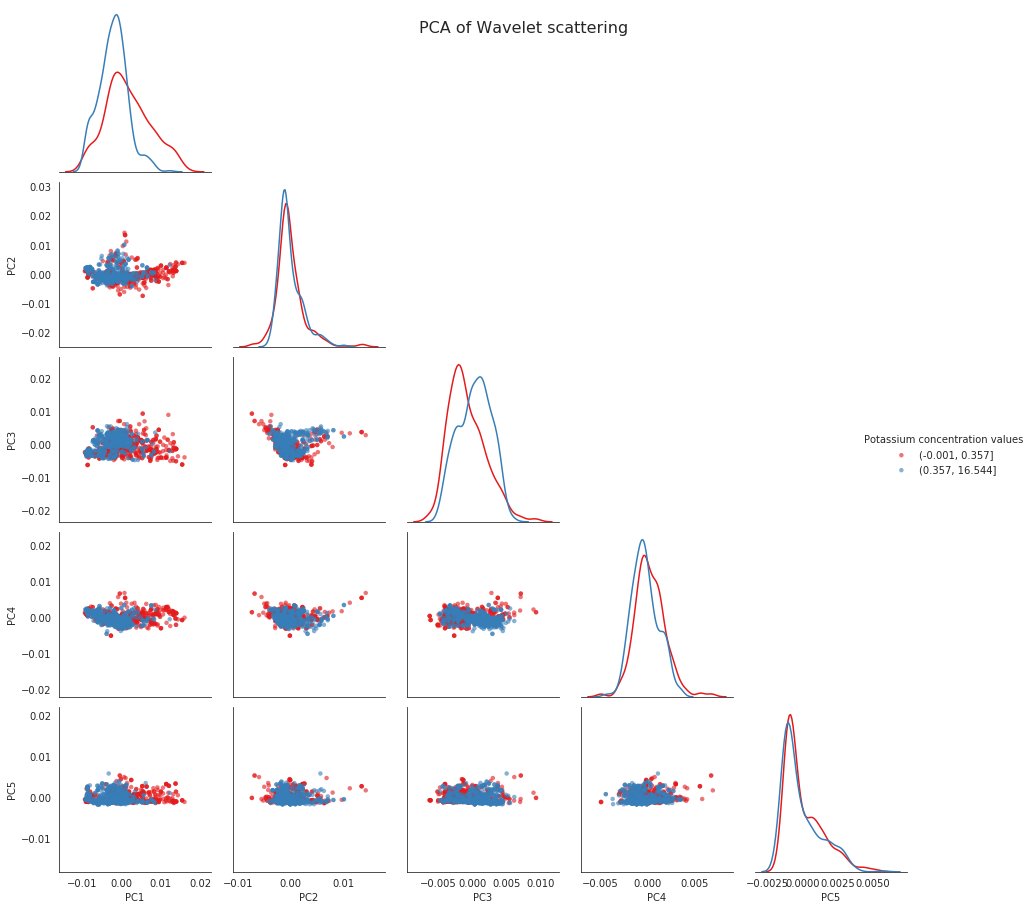

In [26]:
plot_correlogram(X_scatter_pca, y[idx, -1], q=2, sample=1000, alpha=0.6, y_label='Potassium', title='PCA of Wavelet scattering')

In [27]:
y_digitized = np.digitize(y[:,-1], [np.median(y[:,-1])])
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_scatter_pca, y_digitized[idx])
print('Accuracy of Logistic regression classifier: ', clf.score(X_scatter_pca, y_digitized[idx]))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scatter_pca, y_digitized[idx])
print('Accuracy of k-Nearest Neighbours classifier: ', knn.score(X_scatter_pca, y_digitized[idx]))

Accuracy of Logistic regression classifier:  0.511
Accuracy of k-Nearest Neighbours classifier:  0.838


In [28]:
y_digitized = np.digitize(y[:,-1], [np.median(y[:,-1])])
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_s, y_digitized[idx])
print('Accuracy of Logistic regression classifier: ', clf.score(X_s, y_digitized[idx]))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_s, y_digitized[idx])
print('Accuracy of k-Nearest Neighbours classifier: ', knn.score(X_s, y_digitized[idx]))

Accuracy of Logistic regression classifier:  0.511
Accuracy of k-Nearest Neighbours classifier:  0.868


In [36]:
def preprocess_errors(x):
    x = x[:-1]
    x /= np.abs(x).max()
    return x.reshape(1, -1)

def get_scattering_coeffs_single(x, J=4, Q=30):
    T = x.shape[-1]

    scattering = Scattering1D(J, T, Q)
    Sx = scattering(x.ravel())

    meta = scattering.meta()
    order0 = np.where(meta['order'] == 0)
    order1 = np.where(meta['order'] == 1)
    order2 = np.where(meta['order'] == 2)
    return [Sx[order0][0], Sx[order1], Sx[order2]]

def vis_scattering(x, x_t, Sx_coeffs, Sx_t_coeffs, label = 'Best', label_t = 'Preprocessed signal'):
    fig = plt.figure(constrained_layout=True, figsize=(16, 12))
    gs = fig.add_gridspec(nrows=6, ncols=2)

    ##############################################
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.title.set_text(label)
    ax1.plot(X_names[:-1], x.ravel(), color='firebrick')
    ax1.plot(X_names[:-1], x_t.ravel(), '--', linewidth=1, color='forestgreen')
    ax1.set_frame_on(False)
    ax1.set_xlim(4000, 600)

    #ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.title.set_text(label_t)
    #ax2.plot(X_names[:-1], x.ravel(), '--', linewidth=1, color='black')
    ax2.plot(X_names[:-1], x_t.ravel(), '--', linewidth=1, color='forestgreen')
    ax2.set_frame_on(False)
    ax2.set_xlim(4000, 600)
    #ax2.axis('off')


    ##############################################
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.title.set_text('Low pass filter: zeroth-order scattering')
    ax3.plot(Sx_coeffs[0])
    ax3.set_frame_on(False)
    ax3.set_xlim(0, len(Sx_coeffs[0]))

    ax4 = fig.add_subplot(gs[1, 1], sharex=ax3, sharey=ax3)
    ax4.plot(Sx_t_coeffs[0])
    ax4.axis('off')


    ##############################################
    ax5 = fig.add_subplot(gs[2:4, 0])
    ax5.title.set_text('First-order scattering')
    ax5.imshow(Sx_coeffs[1], aspect='auto')
    ax5.set_frame_on(False)
    #ax5.set_xlim(0, len(Sx_coeffs[1]))
    
    ax6 = fig.add_subplot(gs[2:4, 1], sharex=ax5, sharey=ax5)
    ax6.imshow(Sx_t_coeffs[1], aspect='auto')
    ax6.axis('off')

    ##############################################
    ax7 = fig.add_subplot(gs[4:6, 0])
    ax7.title.set_text('Second-order scattering')
    #ax7.set_xlim(0, len(Sx_coeffs[2]))
    ax7.set_frame_on(False)
    ax7.imshow(Sx_coeffs[2], aspect='auto')

    ax8 = fig.add_subplot(gs[4:6, 1], sharex=ax7, sharey=ax7)
    ax8.imshow(Sx_t_coeffs[2], aspect='auto')
    ax8.axis('off');

def vis_scattering_diff(x, x_t, Sx_coeffs, Sx_t_coeffs, label_t = 'Δs when preprocessed signal'):
    fig = plt.figure(constrained_layout=True, figsize=(16, 10))
    gs = fig.add_gridspec(nrows=6, ncols=2, width_ratios=(9.8, 0.2))
    
    fig.suptitle(label_t, fontsize=16)
    ##############################################
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.title.set_text('Δ signals')
    ax1.plot(X_names[:-1], x.ravel() - x_t.ravel(), color='firebrick')
    #ax1.plot(X_names[:-1], x_t.ravel(), '--', linewidth=1, color='forestgreen')
    ax1.set_frame_on(False)
    ax1.set_xlim(4000, 600)

    ##############################################
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.title.set_text('Δ low pass filter: zeroth-order scattering')
    ax3.plot(Sx_coeffs[0] - Sx_t_coeffs[0])
    ax3.set_frame_on(False)
    ax3.set_xlim(0, len(Sx_coeffs[0]))
        
    ##############################################
    ax5 = fig.add_subplot(gs[2:4, 0])
    ax5.title.set_text('Δ first-order scattering')
    im5 = ax5.imshow(np.abs(Sx_coeffs[1] - Sx_t_coeffs[1]), aspect='auto')
    ax5.set_frame_on(False)
    
    # colorbar
    cax5 = plt.subplot(gs[2:4,1])
    plt.colorbar(im5, cax=cax5, format='%.0e')
    

    ##############################################
    ax7 = fig.add_subplot(gs[4:6, 0])
    ax7.title.set_text('Δ second-order scattering')
    ax7.set_frame_on(False)
    im7 = ax7.imshow(np.abs(Sx_coeffs[2] - Sx_t_coeffs[2]), aspect='auto')
    
    # colorbar
    cax7 = plt.subplot(gs[4:6,1])
    plt.colorbar(im7, cax=cax7, format='%.0e')

In [33]:
np.argmax(y[idx,-1])

141

In [34]:
np.argmin(y[idx,-1])

2

In [212]:
idx_y_valid = y[:, -1] > 0

In [394]:
J = 3 # Default 4 - when J increases, it decreases time resolution and have more translation-invariant properties
Q = 8 # Default 30

x_best = preprocess_errors(X[idx_y_valid,:][np.argmax(y[idx,-1]),:])
x_worst = preprocess_errors(X[idx_y_valid,:][np.argmin(y[idx,-1]),:])

Sx_best_coeffs = get_scattering_coeffs_single(x_best, J=J, Q=Q)
Sx_worst_coeffs = get_scattering_coeffs_single(x_worst, J=J, Q=Q)
vis_scattering(x_best, x_worst, Sx_best_coeffs, Sx_worst_coeffs, label='Max Potassium', label_t='Min Potassium')
vis_scattering_diff(x_best, x_worst, Sx_best_coeffs, Sx_worst_coeffs, label_t='Worst vs. best')

TypeError: super(type, obj): obj must be an instance or subtype of type

### Metrics in high-dimensions

### Quick comparison PLSR vs. RF on Potassium

##### PLSR

In [197]:
def assess_model_complexity(X_train, X_valid, y_train, y_valid, analyte, n_comp=10, plot=True):
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
    mse_train = []
    mse_valid = []
    y_train = get_analyte(y_train, y_names, analyte)
    y_valid = get_analyte(y_valid, y_names, analyte)
    component = np.arange(1, n_comp)
    for i in tqdm(component):
        pls = PLSRegression(n_components=i)
        pls.fit(X_train, y_train)
        y_train_pred = pls.predict(X_train)
        y_valid_pred = pls.predict(X_valid)
        mse_train.append(mean_squared_error(y_train, y_train_pred))
        mse_valid.append(mean_squared_error(y_valid, y_valid_pred))

    msemin = np.argmin(mse_valid)
    print('Suggested number of components: ', msemin+1)
    
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(X_train, y_train)
    y_train_pred = pls.predict(X_train)
    y_valid_pred = pls.predict(X_valid)
    score_train = r2_score(y_train, y_train_pred)
    score_valid = r2_score(y_valid, y_valid_pred)
    print('R2 train: %5.3f'  % score_train)
    print('R2 validation: %5.3f'  % score_valid)
    
    if plot is True:
        fig, ax = plt.subplots(figsize=(10,6))
        _ = ax.plot(component, np.array(mse_train), '-v', color = 'blue', mfc='blue')
        _ = ax.plot(component, np.array(mse_valid), '-v', color = 'red', mfc='red')
        plt.xlabel('Number of PLS components')
        plt.ylabel('MSE of predicted {} content'.format(analyte))
        plt.title('Assessing model complexity')
        
    return score_valid   


def get_analyte(y, names, name):
    list(y_names).index(name)
    return y[:,list(y_names).index(name)]


def optimise_pls_cv(X, y, n_comp=10, cv=20, plot_components=True, analyte='P'):
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
    mse = []
    #y = get_analyte(y, y_names, analyte)
    component = np.arange(1, n_comp)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=cv)
        mse.append(mean_squared_error(y, y_cv))
      
    
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
   
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE cross-validation')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.show()
        
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
    # Fit to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=cv)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
#     print('R2 calib: %5.3f'  % score_c)
#     print('R2 CV: %5.3f'  % score_cv)
#     print('MSE calib: %5.3f' % mse_c)
#     print('MSE CV: %5.3f' % mse_cv)
    
#     # Plot regression and figures of merit
#     rangey = max(y) - min(y)
#     rangex = max(y_c) - min(y_c)
#     # Fit a line to the CV vs response
#     z = np.polyfit(y, y_c, 1)
#     with plt.style.context(('ggplot')):
#         fig, ax = plt.subplots(figsize=(9, 5))
#         ax.scatter(y_c, y, c='red', edgecolors='k')
#         #Plot the best fit line
#         ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
#         #Plot the ideal 1:1 line
#         ax.plot(y, y, color='green', linewidth=1)
#         plt.title('$R^{2}$ (CV): '+str(score_cv))
#         plt.xlabel('Predicted analyte')
#         plt.ylabel('Measured Analyte')
#         plt.show()
    
    #return pls_opt
    return (score_c, score_cv)

In [ ]:
idx_y_valid = y[:, -1] > 0
idx_order = y[:,1] == 12
idx = idx_y_valid & idx_order

X = X[idx,:]
y = y[idx,:]

In [149]:
get_tax_orders_lookup_tbl()

{'alfisols': 0,
 'mollisols': 1,
 'inceptisols': 2,
 'entisols': 3,
 'spodosols': 4,
 nan: 5,
 'ultisols': 6,
 'andisols': 7,
 'histosols': 8,
 'oxisols': 9,
 'vertisols': 10,
 'aridisols': 11,
 'gelisols': 12}

In [198]:
def iterate_over_orders(X, y, low_bound=400, up_bound=500):
    orders = get_tax_orders_lookup_tbl()
    for k, v in orders.items():
        idx_order = (y[:, 1] == v)
        idx_y_valid = (y[:, -1] > 0)
        X_s = X[(idx_order & idx_y_valid), :]
        y_s = y[(idx_order & idx_y_valid), :]
        if X_s.shape[0] >= up_bound:
            idx_subset = np.random.randint(y_s.shape[0], size=500)            
            y_s = y_s[idx_subset, :]
            X_s = X_s[idx_subset, :]
        if X_s.shape[0] >= low_bound:
            print(20*'-')
            print('Taxonomic order: ', k)
            print(20*'-')
            X_train, X_valid, y_train, y_valid = train_test_split(X_s, y_s[:,-1], test_size=0.20, random_state=42)
            X_train_deriv = savgol_filter(X_train, 11, polyorder = 1, deriv=1)
            score_c, score_cv = optimise_pls_cv(X_train_deriv, y_train, n_comp=30, cv=5, 
                                                plot_components=False, analyte='Potassium')
            print('R2 calib: %5.3f'  % score_c)
            print('R2 CV: %5.3f'  % score_cv, '\n')

In [199]:
iterate_over_orders(X, y)

--------------------
Taxonomic order:  alfisols
--------------------
Suggested number of components:  18
R2 calib: 0.736
R2 CV: 0.395 

--------------------
Taxonomic order:  mollisols
--------------------
Suggested number of components:  19
R2 calib: 0.729
R2 CV: 0.357 

--------------------
Taxonomic order:  inceptisols
--------------------
Suggested number of components:  5
R2 calib: 0.394
R2 CV: 0.274 

--------------------
Taxonomic order:  entisols
--------------------
Suggested number of components:  13
R2 calib: 0.717
R2 CV: 0.488 

--------------------
Taxonomic order:  spodosols
--------------------
Suggested number of components:  17
R2 calib: 0.901
R2 CV: 0.787 

--------------------
Taxonomic order:  nan
--------------------
Suggested number of components:  11
R2 calib: 0.690
R2 CV: 0.433 

--------------------
Taxonomic order:  ultisols
--------------------
Suggested number of components:  11
R2 calib: 0.621
R2 CV: 0.494 

--------------------
Taxonomic order:  andisols
-

In [107]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y[:,-1], test_size=0.20, random_state=42)

  3%|▎         | 1/29 [00:00<00:03,  9.28it/s]

********************
Predicting:  Potassium
********************


100%|██████████| 29/29 [00:09<00:00,  2.99it/s]


Suggested number of components:  22


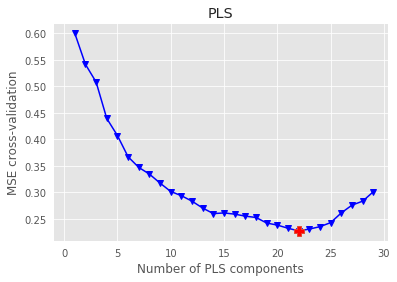

R2 calib: 0.858
R2 CV: 0.741
MSE calib: 0.124
MSE CV: 0.227


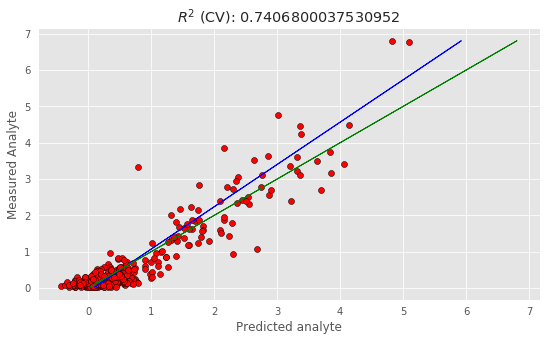

In [108]:
X_train_deriv = savgol_filter(X_train, 11, polyorder = 1, deriv=1)
pls_opt = optimise_pls_cv(X_train_deriv, y_train, n_comp=30, cv=5, plot_components=True, analyte='Potassium')

#### Random Forest

R2 on calibration:  0.8678374286783763
R2 on validation:  0.4143632392475477
R2 on test set:  0.5260153653742078
CPU times: user 27 s, sys: 1.15 s, total: 28.2 s
Wall time: 2min 32s


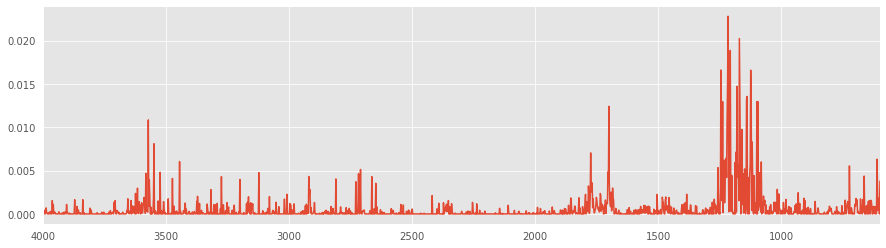

In [88]:
%%time

rnd_reg = RandomForestRegressor(n_estimators=100, max_depth=5, max_leaf_nodes=16, n_jobs=-1)

rnd_reg.fit(X_train, y_train)

y_c = rnd_reg.predict(X_train)
y_t_hat = rnd_reg.predict(X_valid)

y_cv = cross_val_predict(rnd_reg, X_train, y_train, cv=20)

score_c = r2_score(y_train, y_c)
score_cv = r2_score(y_train, y_cv)
score_t_hat = r2_score(y_valid, y_t_hat)
print('R2 on calibration: ', score_c)
print('R2 on validation: ', score_cv)
print('R2 on test set: ', score_t_hat)

# Visualizing feature importance
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(15,4))
    ax.set_xlim(4000, 600)
    _ = ax.plot(X_names, rnd_reg.feature_importances_)

### Assessing model complexity

In [223]:
get_tax_orders_lookup_tbl()

{'alfisols': 0,
 'mollisols': 1,
 'inceptisols': 2,
 'entisols': 3,
 'spodosols': 4,
 nan: 5,
 'ultisols': 6,
 'andisols': 7,
 'histosols': 8,
 'oxisols': 9,
 'vertisols': 10,
 'aridisols': 11,
 'gelisols': 12}

In [386]:
idx_y_valid = y[:, -1] > 0
idx_order = y[:,1] == 2
idx = idx_y_valid & idx_order

X_subset = X[idx,:]
y_subset = y[idx,:]
X_subset.shape

(4086, 1764)

In [387]:
X_subset = savgol_filter(X_subset, 11, polyorder = 1, deriv=1)
X_subset, X_test, y_subset, y_test = train_test_split(X_subset, y_subset[:, -1], test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_subset, y_subset, test_size=0.20, random_state=40)
print('X test shape: ', X_test.shape)
print('X valid shape: ', X_valid.shape)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)

X test shape:  (818, 1764)
X valid shape:  (654, 1764)
X train shape:  (2614, 1764)
y train shape:  (2614,)


In [374]:
train_errors, val_errors = [], []
for c in tqdm(range(1,60)):
    model = PLSRegression(n_components=c)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_val_predict = model.predict(X_valid)
    y_test_predict = model.predict(X_test)
    train_errors.append(r2_score(y_train, y_train_predict))
    val_errors.append(r2_score(y_valid, y_val_predict))

100%|██████████| 59/59 [00:55<00:00,  1.07it/s]


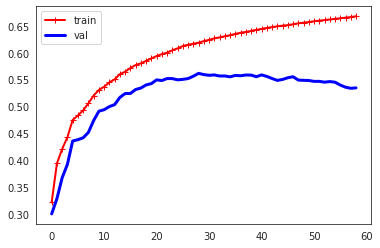

In [378]:
plt.plot(train_errors, 'r-+', linewidth=2, label='train')
plt.plot(val_errors, 'b-', linewidth=3, label='val')
plt.legend()

In [379]:
np.argmax(val_errors)

28

In [380]:
model = PLSRegression(n_components=np.argmax(val_errors))
model.fit(X_train, y_train)
r2_score(y_test, model.predict(X_test))

0.5829786626667341

In [366]:
# Random Forest regressor
train_errors, val_errors = [], []
for d in tqdm(range(2,10)):
    model = RandomForestRegressor(max_depth=d, n_estimators=100)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_val_predict = model.predict(X_valid)
    y_test_predict = model.predict(X_test)
    train_errors.append(r2_score(y_train, y_train_predict))
    val_errors.append(r2_score(y_valid, y_val_predict))

100%|██████████| 8/8 [04:46<00:00, 35.85s/it]


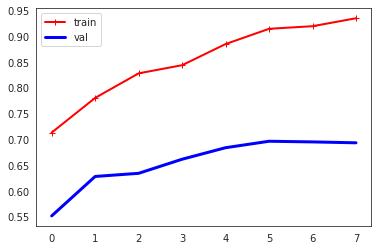

In [367]:
plt.plot(train_errors, 'r-+', linewidth=2, label='train')
plt.plot(val_errors, 'b-', linewidth=3, label='val')
plt.legend()

In [368]:
np.argmax(val_errors)

5

In [369]:
model = RandomForestRegressor(max_depth=np.argmax(val_errors), n_estimators=100)
model.fit(X_train, y_train)
r2_score(y_test, model.predict(X_test))

0.3532514423843309

In [332]:
# Random Forest regressor in PCA space

In [354]:
X_subset = compute_pca(StandardScaler().fit_transform(X_subset), n_components=50)
X_subset, X_test, y_subset, y_test = train_test_split(X_subset, y_subset[:, -1], test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_subset, y_subset, test_size=0.20, random_state=40)
print('X test shape: ', X_test.shape)
print('X valid shape: ', X_valid.shape)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)

X test shape:  (818, 50)
X valid shape:  (654, 50)
X train shape:  (2614, 50)
y train shape:  (2614,)


In [355]:
# Random Forest regressor
train_errors, val_errors = [], []
for d in tqdm(range(2,30)):
    model = RandomForestRegressor(max_depth=d, n_estimators=500)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_val_predict = model.predict(X_valid)
    y_test_predict = model.predict(X_test)
    train_errors.append(r2_score(y_train, y_train_predict))
    val_errors.append(r2_score(y_valid, y_val_predict))

100%|██████████| 28/28 [16:15<00:00, 34.85s/it]


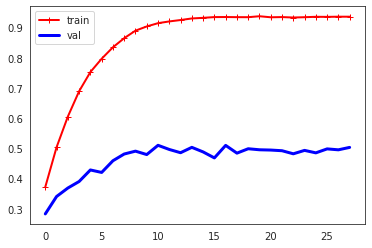

In [356]:
plt.plot(train_errors, 'r-+', linewidth=2, label='train')
plt.plot(val_errors, 'b-', linewidth=3, label='val')
plt.legend()

In [357]:
np.argmax(val_errors)

10

In [358]:
model = RandomForestRegressor(max_depth=np.argmax(val_errors), n_estimators=500)
model.fit(X_train, y_train)
r2_score(y_test, model.predict(X_test))

0.5918546297104124

### Learning curves

In [389]:
# With PLS
train_errors, val_errors = [], []
for m in tqdm(range(5, len(X_train), 20)):
    model = PLSRegression(n_components=28)
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_valid)
    #y_test_predict = model.predict(X_test)
    train_errors.append(r2_score(y_train[:m], y_train_predict))
    val_errors.append(r2_score(y_valid, y_val_predict))

  0%|          | 0/131 [00:00<?, ?it/s]/home/franck/pro/dev/spectrai/venv/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 4
  warnings.warn('Y residual constant at iteration %s' % k)
/home/franck/pro/dev/spectrai/venv/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 24
  warnings.warn('Y residual constant at iteration %s' % k)
100%|██████████| 131/131 [00:53<00:00,  2.44it/s]


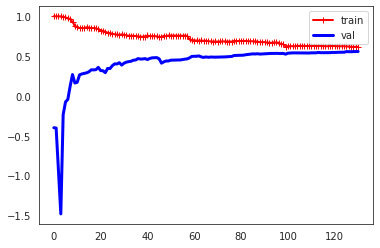

In [390]:
plt.plot(train_errors, 'r-+', linewidth=2, label='train')
plt.plot(val_errors, 'b-', linewidth=3, label='val')
plt.legend()

In [392]:
# With random forest
train_errors, val_errors = [], []
for m in tqdm(range(5, len(X_train), 50)):
    model = RandomForestRegressor(max_depth=10, n_estimators=20)
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_valid)
    #y_test_predict = model.predict(X_test)
    train_errors.append(r2_score(y_train[:m], y_train_predict))
    val_errors.append(r2_score(y_valid, y_val_predict))

100%|██████████| 53/53 [16:54<00:00, 19.13s/it]


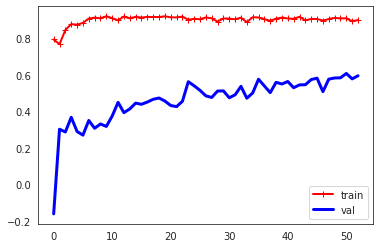

In [393]:
plt.plot(train_errors, 'r-+', linewidth=2, label='train')
plt.plot(val_errors, 'b-', linewidth=3, label='val')
plt.legend()

In [396]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()))

In [ ]:
sep = np.sqrt(K.sum(K.square(y_true - y_pred)) / len(y_true))

In [ ]:
def rpd(y_true_y_pred):
    sep = np.sqrt(K.sum(K.square(y_true - y_pred)) / len(y_true))
    sd = np.std(y_true)
    return sd/sep

In [ ]:
def pls_variable_selection(X, y, max_comp, cv=5, metric_fn=mean_squared_error):
    # Define metric array to be populated
    metric = np.zeros((max_comp,X.shape[1]))
    
    # Loop over the number of PLS components
    for i in tqdm(range(max_comp)):
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
        
        # Sort spectra accordingly 
        Xc = X[:, sorted_ind]
        
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=cv)
            metric[i,j] = metric_fn(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        #stdout.write("\r%d%% completed" % comp)
        #stdout.flush()
        
    #stdout.write("\n")
    
    # Calculate and print the position of minimum in MSE
    metric_minx, metric_miny = np.where(metric==np.min(metric[np.nonzero(metric)]))
    print("Optimised number of PLS components: ", metric_minx[0]+1)
    print("Wavelengths to be discarded ",metric_miny[0])
    print('Optimised Metric ', metric[metric_minx,metric_miny][0])
    #stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=metric_minx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
    Xc = X[:,sorted_ind]
